In [1]:
from dfLoader import * 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
import argparse
import torch
from evalModel import printClassAccuracy
from dfLoader import classes
import torch.nn as nn
from sklearn.datasets import load_iris  # Replace this with your own dataset
t2np = lambda t: t.detach().cpu().numpy()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


/home/jingyuan/miniconda3/envs/mlp/lib/python3.8/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (None)/charset_normalizer (3.0.1) doesn't match a supported version!
  warnings.warn(


In [24]:
def plot_tsne(X, y, labels, title):
    plt.figure(figsize=(15, 13))
    unique_labels = np.unique(y)
    num_classes = len(unique_labels)
    colormap = plt.cm.get_cmap('tab20', num_classes)  # You can use other colormaps, like 'tab20', 'tab20b', 'tab20c', 'viridis', 'plasma', 'inferno', or 'magma'
    
    handles = []  # List to store the handles of the scatter plots
    new_labels = []
    
    for i, label in enumerate(unique_labels):
        color = colormap(i)
        scatter_plot = plt.scatter(X[y == label, 0], X[y == label, 1], label=labels[i], color=color, alpha=0.7)
        handles.append(scatter_plot)
        new_labels.append(labels[i])
        
    zippedList = list(zip(new_labels,handles))
    zippedList.sort(key=lambda x: x[0])
    new_labels,handles = zip(*(zippedList))
    
    plt.legend(handles, new_labels, fontsize = 12)
    plt.xlabel("Dimension 1", size = 25)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.ylabel("Dimension 2",size = 25)
    plt.title(f"{title}", size = 25)
    plt.savefig(f"{title}.png", dpi=300)
    plt.show()

In [3]:
classesDic = {
    'Myotis daubentonii': 0,
    'Plecotus auritus': 1,
    'Pipistrellus pipistrellus': 2,
    # 'Bat': 3,
    'Nyctalus leisleri': 3,
    'Pipistrellus pygmaeus': 4,
    'Myotis mystacinus': 5,
    'Myotis nattereri': 6,
    'Pipistrellus nathusii': 7,
    'Nyctalus noctula': 8,
    'Eptesicus serotinus': 9,
    'Barbastellus barbastellus': 10,
    'Myotis brandtii': 11,
    'Myotis alcathoe': 12,
    'Myotis bechsteinii': 13,
    'Plecotus austriacus': 14,
    'Rhinolophus ferrumequinum': 15,
    'Rhinolophus hipposideros': 16,
    'noise':17
 }


In [4]:
genusDic = {'Barbastellus barbastellus': 'Barbastella', 
            'Eptesicus serotinus': 'Eptesicus', 
            'Myotis alcathoe':'Myotis', 
            'Myotis bechsteinii': 'Myotis', 
            'Myotis brandtii': 'Myotis', 
            'Myotis daubentonii': 'Myotis',
            'Myotis mystacinus': 'Myotis', 
            'Myotis nattereri': 'Myotis', 
            'Myotis myotis': 'Myotis', 
            'Nyctalus leisleri': 'Nyctalus', 
            'Nyctalus noctula': 'Nyctalus', 
            'Pipistrellus nathusii': 'Pipistrellus',
            'Pipistrellus pipistrellus': 'Pipistrellus',
            'Pipistrellus pygmaeus': 'Pipistrellus', 
            'Plecotus auritus': 'Plecotus', 
            'Plecotus austriacus': 'Plecotus', 
            'Rhinolophus ferrumequinum': 'Rhinolophus',
            'Rhinolophus hipposideros': 'Rhinolophus'}

In [5]:
genusNumDic = {
    'Barbastella':0,
    'Eptesicus':1,
    'Myotis':2,
    'Nyctalus':3,
    'Pipistrellus':4,
    'Plecotus':5,
    'Rhinolophus':6
 }


In [6]:
genus = ['Barbastella',
 'Eptesicus',
 'Myotis',
 'Nyctalus',
 'Pipistrellus',
 'Plecotus',
 'Rhinolophus']


In [7]:
genus

['Barbastella',
 'Eptesicus',
 'Myotis',
 'Nyctalus',
 'Pipistrellus',
 'Plecotus',
 'Rhinolophus']

In [8]:
numTransDic = {}
for i in classes:
    if i == 'noise':
        continue
    specisNum = classesDic[i]
    genusName = genusDic[i]
    genusNum = genusNumDic[genusName]
    numTransDic[specisNum] = genusNum

In [9]:
numTransDic

{0: 2,
 1: 5,
 2: 4,
 3: 3,
 4: 4,
 5: 2,
 6: 2,
 7: 4,
 8: 3,
 9: 1,
 10: 0,
 11: 2,
 12: 2,
 13: 2,
 14: 5,
 15: 6,
 16: 6}

In [10]:
def speciesToGenus(y_species):
    y_species = t2np(y_species)
    y_genus = []
    for i in y_species:
        y_genus.append(numTransDic[i])
    return np.array(y_genus)

In [11]:
dataset = torch.load('datasets/Test_dataSet.pt')
X = dataset.tensors[0]
y = dataset.tensors[1]


In [12]:
def init_weights(layer):
    if isinstance(layer, nn.Conv2d):
        nn.init.kaiming_uniform_(layer.weight, mode='fan_in', nonlinearity='relu')
    elif isinstance(layer, nn.Linear):
        nn.init.xavier_uniform_(layer.weight)

In [13]:
from resNet18LinEval import ResNet_18, ResNet_18_linEval
latent_size = 512
model = ResNet_18(1,18)
# model.load_state_dict(torch.load(f'models/bestSupervised.pth'))
model.to(device)

DSmodel = ResNet_18_linEval(model,latent_size, 18).to(device)
for param in DSmodel.parameters():
        init_weights(param)


In [12]:
from autoEncoder import ConvAutoencoder, DSModel

 
inputChannel = 1
latent_size = 512
linEval = True

model = ConvAutoencoder(inputChannel, latent_size)
model.load_state_dict(torch.load(f'models/Autoencoder.pth'))
model.to(device)

DSmodel = DSModel(model,18, latent_size, linEval).to(device)

In [12]:
from simCLR import SimCLR, DSModel

inputChannel = 1
latent_size = 512
linEval = True

model = SimCLR(inputChannel, latent_size)
model.load_state_dict(torch.load(f'models/SimCLR_stronger_aug.pth'))
model.to(device)

DSmodel = DSModel(model,18, linEval, latent_size).to(device)

In [14]:
X = DSmodel(X.view(-1,1,128,32).to(device))


In [15]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset and labels
X = t2np(X) # Your dataset in high-dimensional space
X = X.reshape(X.shape[0], -1)
labels = t2np(y) # Your class labels for each point

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

/home/jingyuan/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jingyuan/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [16]:
y_genus = speciesToGenus(y)

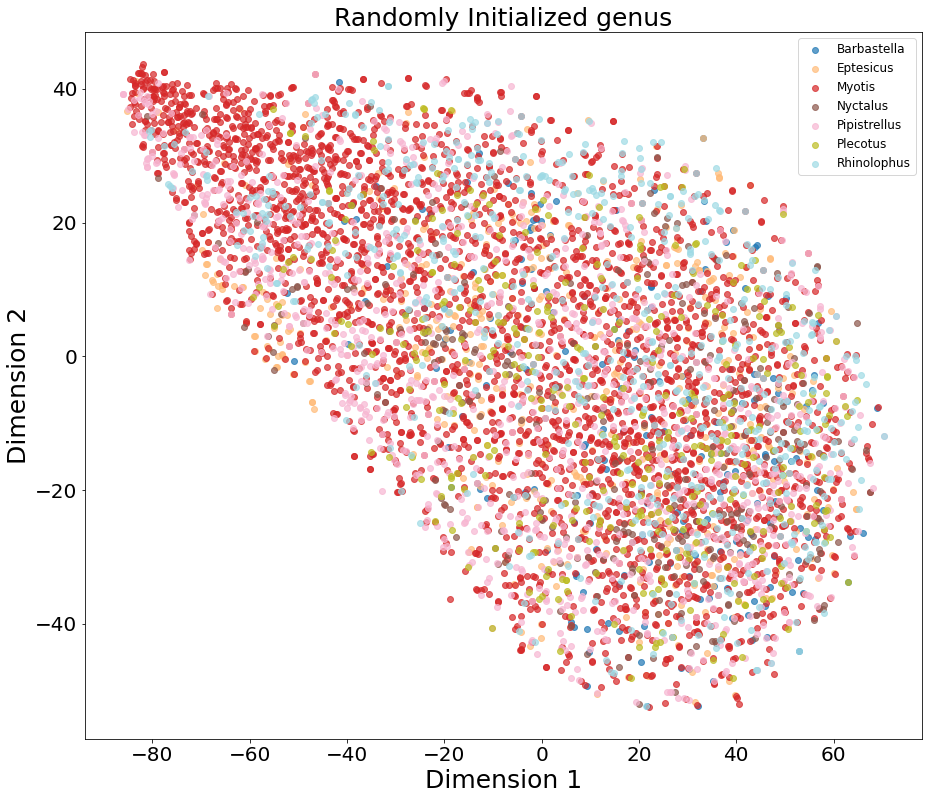

In [25]:
plot_tsne(X_tsne, y_genus, genus,'Randomly Initialized genus')

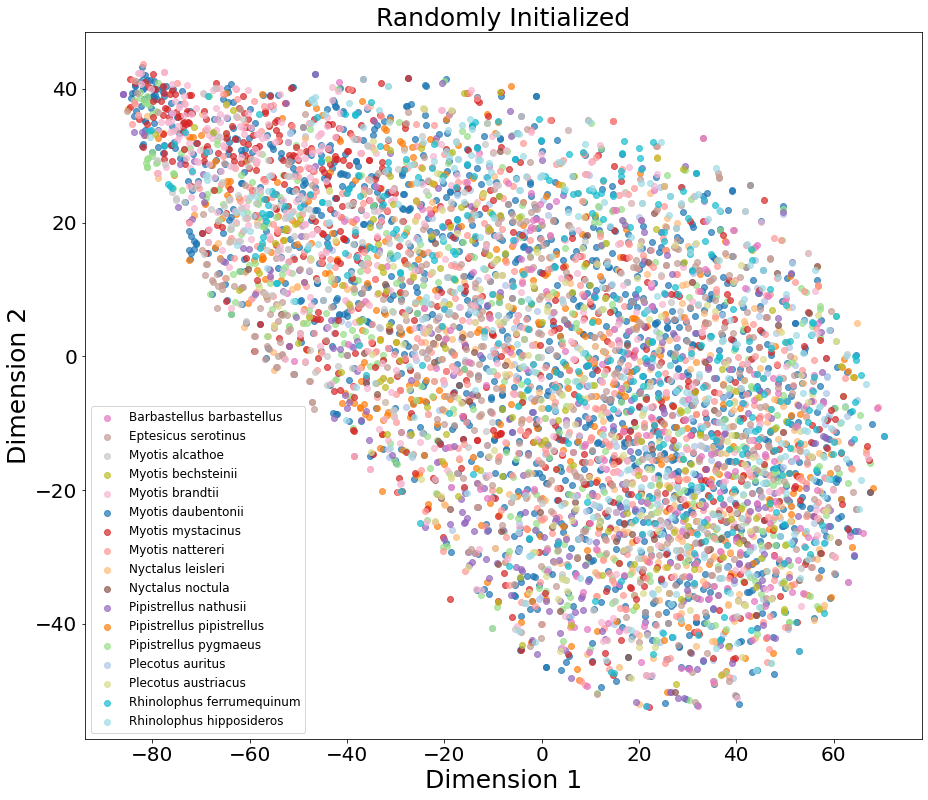

In [26]:
plot_tsne(X_tsne, y, classes, 'Randomly Initialized')

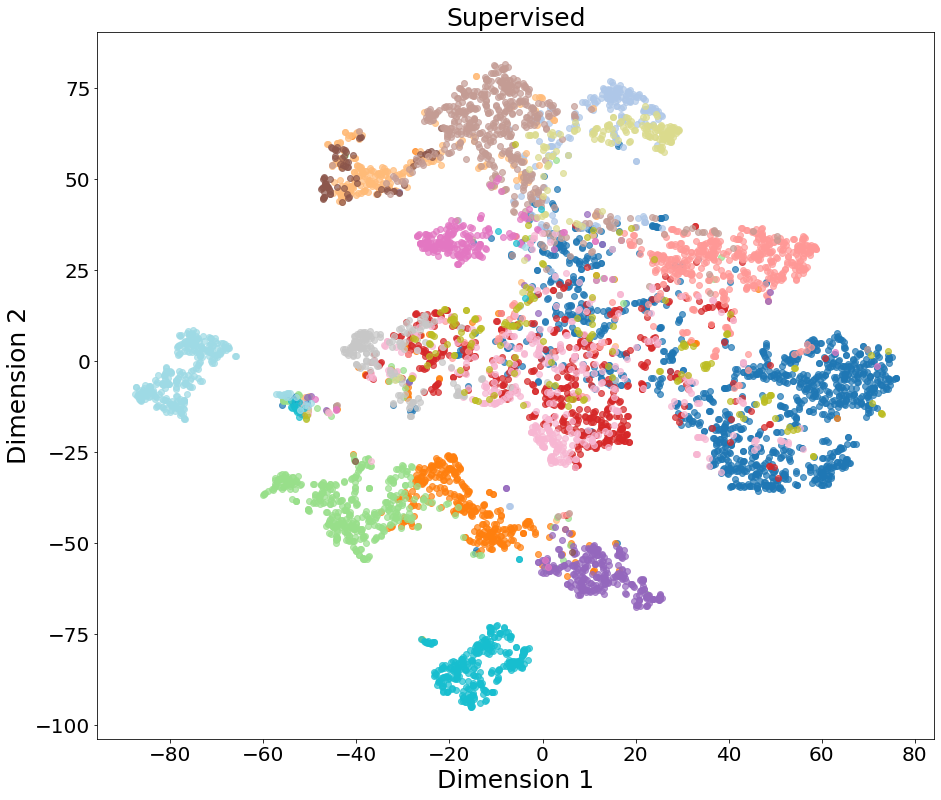

In [18]:
plot_tsne(X_tsne, y, classes, 'Supervised')

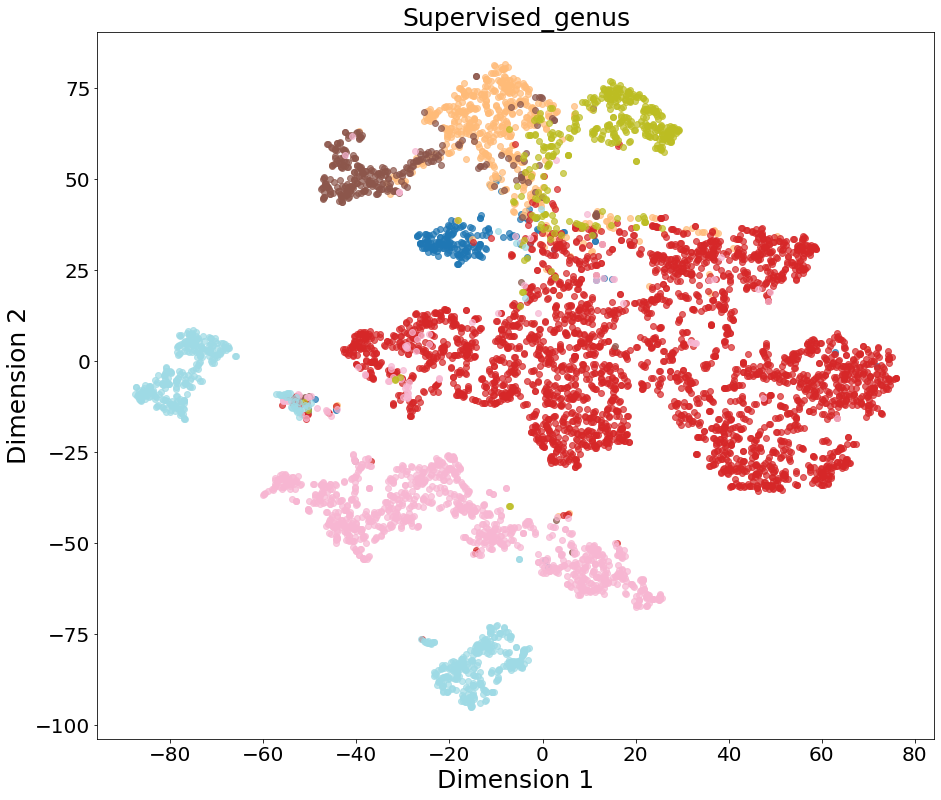

In [17]:
plot_tsne(X_tsne, y_genus, genus,'Supervised_genus')

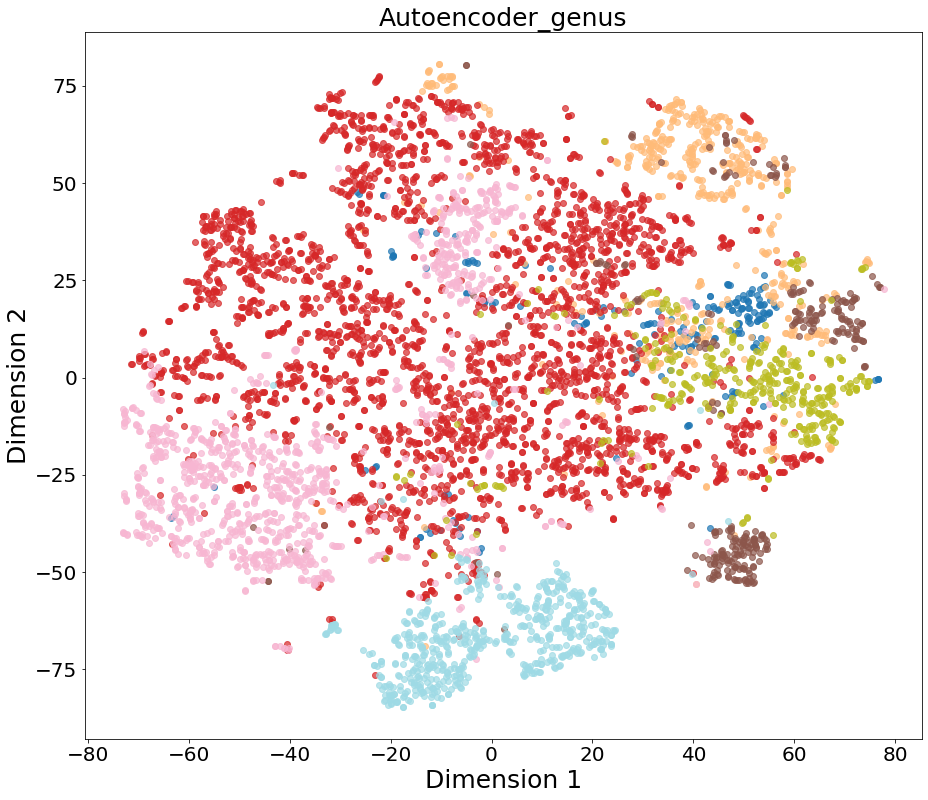

In [17]:
plot_tsne(X_tsne, y_genus, genus,'Autoencoder_genus')

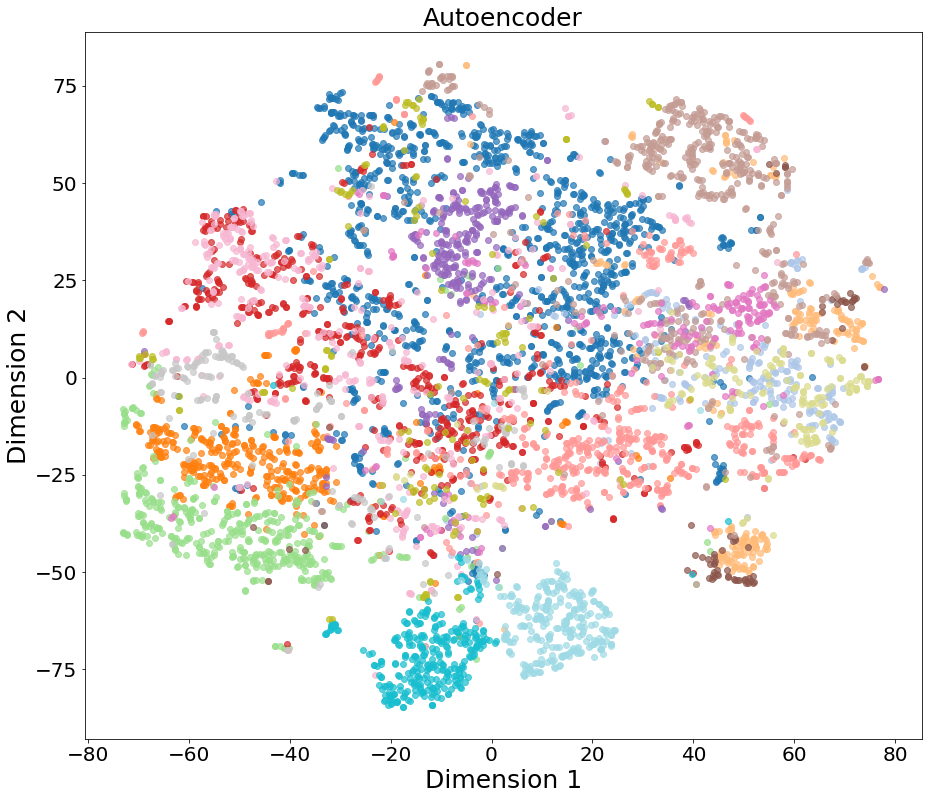

In [16]:
plot_tsne(X_tsne, y, classes, 'Autoencoder')

[('Myotis daubentonii', <matplotlib.collections.PathCollection object at 0x7f153e5a7790>), ('Plecotus auritus', <matplotlib.collections.PathCollection object at 0x7f153e5a7ee0>), ('Pipistrellus pipistrellus', <matplotlib.collections.PathCollection object at 0x7f153e5a7a90>), ('Nyctalus leisleri', <matplotlib.collections.PathCollection object at 0x7f153e53a5b0>), ('Pipistrellus pygmaeus', <matplotlib.collections.PathCollection object at 0x7f153e53ad60>), ('Myotis mystacinus', <matplotlib.collections.PathCollection object at 0x7f153e53a4f0>), ('Myotis nattereri', <matplotlib.collections.PathCollection object at 0x7f153e53a7f0>), ('Pipistrellus nathusii', <matplotlib.collections.PathCollection object at 0x7f153e540580>), ('Nyctalus noctula', <matplotlib.collections.PathCollection object at 0x7f153e540610>), ('Eptesicus serotinus', <matplotlib.collections.PathCollection object at 0x7f153e540910>), ('Barbastellus barbastellus', <matplotlib.collections.PathCollection object at 0x7f153e4bac40

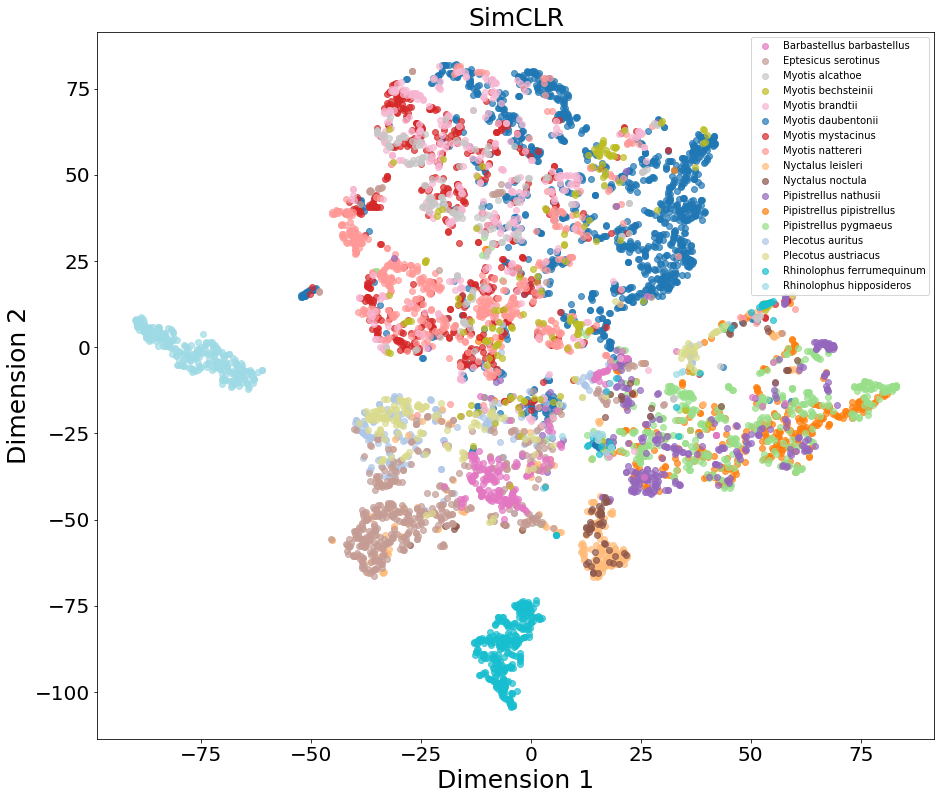

In [36]:
plot_tsne(X_tsne, y, classes, 'SimCLR')

In [ ]:
plot_tsne(X_tsne, y, classes, 'SimCLR')

[('Myotis daubentonii', <matplotlib.collections.PathCollection object at 0x7f1530dd8460>), ('Plecotus auritus', <matplotlib.collections.PathCollection object at 0x7f1530dd88b0>), ('Pipistrellus pipistrellus', <matplotlib.collections.PathCollection object at 0x7f1530dd8d00>), ('Nyctalus leisleri', <matplotlib.collections.PathCollection object at 0x7f1530dbf190>), ('Pipistrellus pygmaeus', <matplotlib.collections.PathCollection object at 0x7f1530dbf5e0>), ('Myotis mystacinus', <matplotlib.collections.PathCollection object at 0x7f1530dbfa30>), ('Myotis nattereri', <matplotlib.collections.PathCollection object at 0x7f1530dd8790>), ('Pipistrellus nathusii', <matplotlib.collections.PathCollection object at 0x7f1530dbff10>), ('Nyctalus noctula', <matplotlib.collections.PathCollection object at 0x7f1530dc8490>), ('Eptesicus serotinus', <matplotlib.collections.PathCollection object at 0x7f1530dc88e0>), ('Barbastellus barbastellus', <matplotlib.collections.PathCollection object at 0x7f1530dc8d30

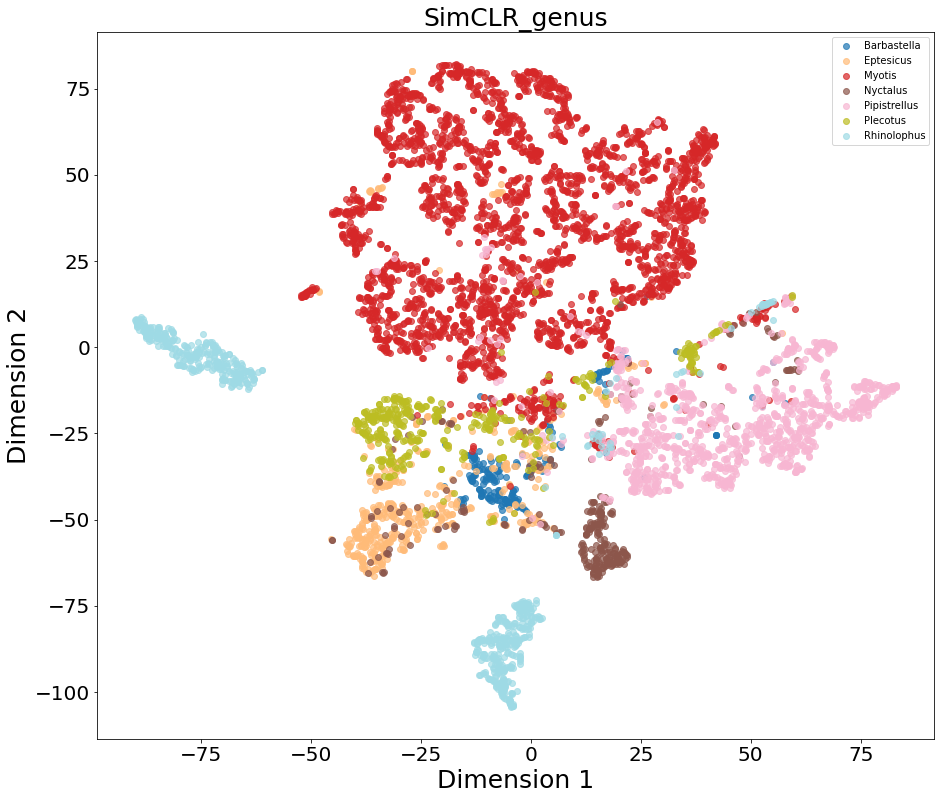

In [17]:
plot_tsne(X_tsne, y_genus, genus,'SimCLR_genus')

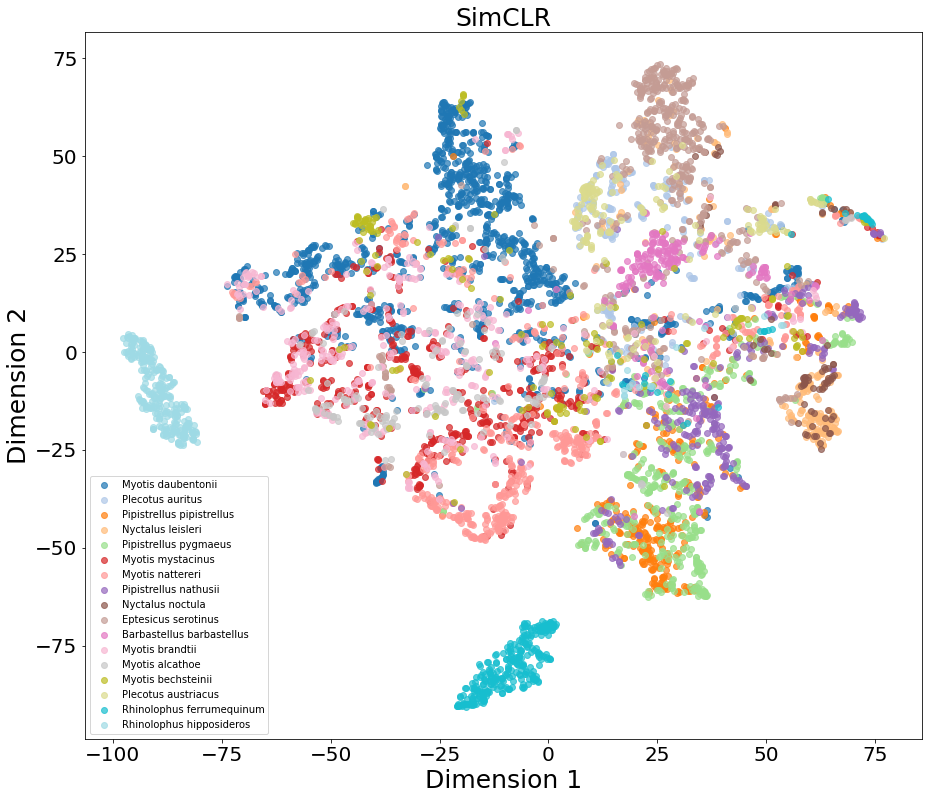

In [18]:
plot_tsne(X_tsne, y, classes, 'SimCLR')

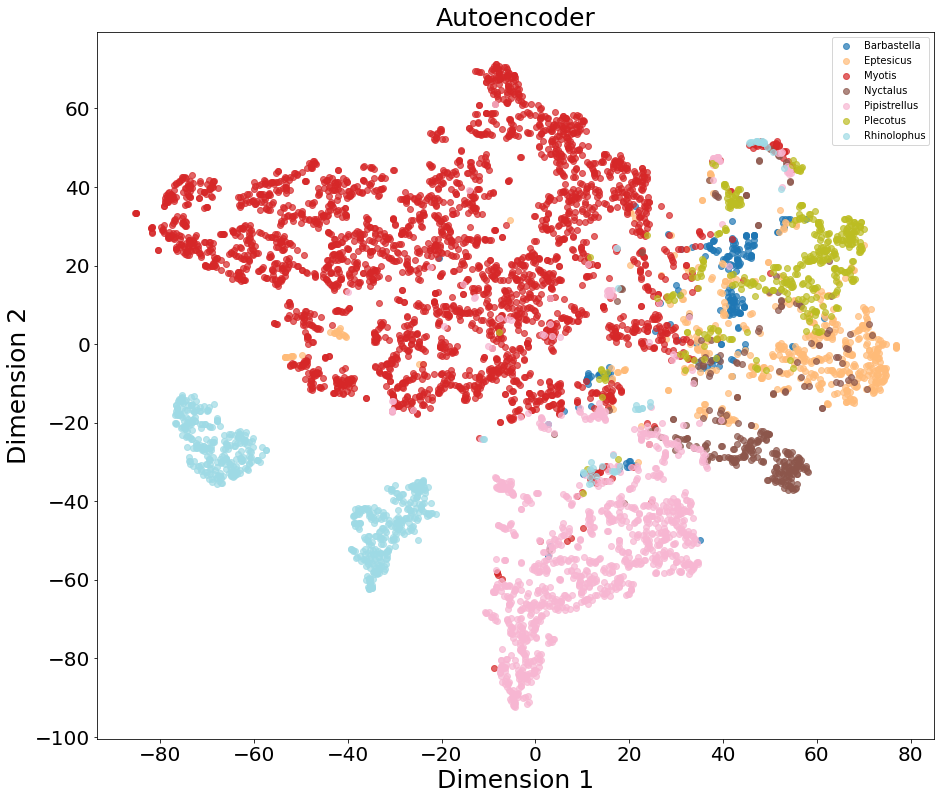

In [56]:
plot_tsne(X_tsne, y_genus, genus,'SimCLR_genus')